DJI Ronin 4D был продан 25 раз, доля товара от выручки составяет 26.05%
Samsung Galaxy Tab S8 был продан 75 раз, доля товара от выручки составяет 10.94%
DJI Mavic 3 был продан 25 раз, доля товара от выручки составяет 7.81%
Philips Hue Smart Bulbs был продан 500 раз, доля товара от выручки составяет 3.12%
Canon EOS R8 был продан 75 раз, доля товара от выручки составяет 46.88%
Bose SoundLink Revolve+ был продан 100 раз, доля товара от выручки составяет 5.21%


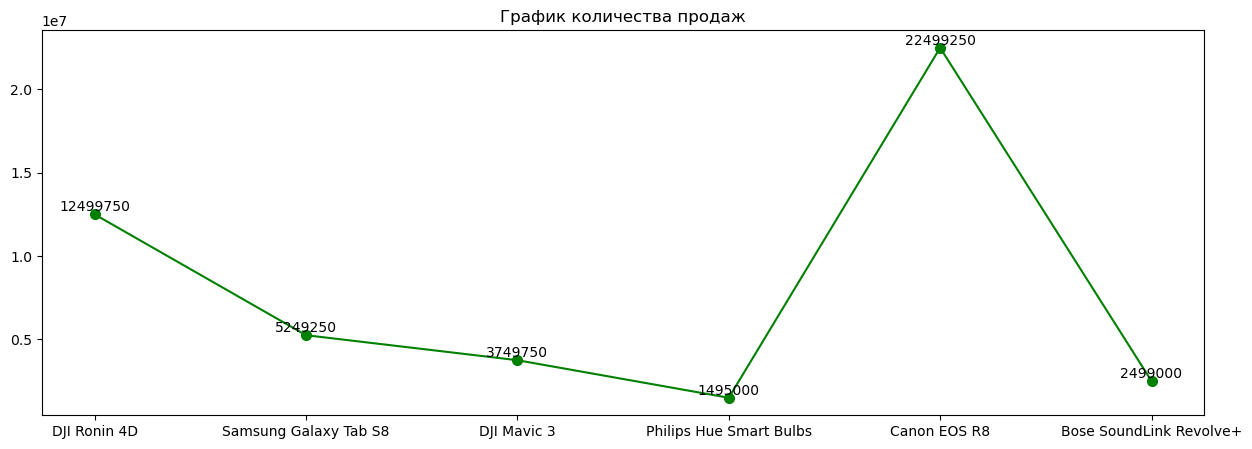

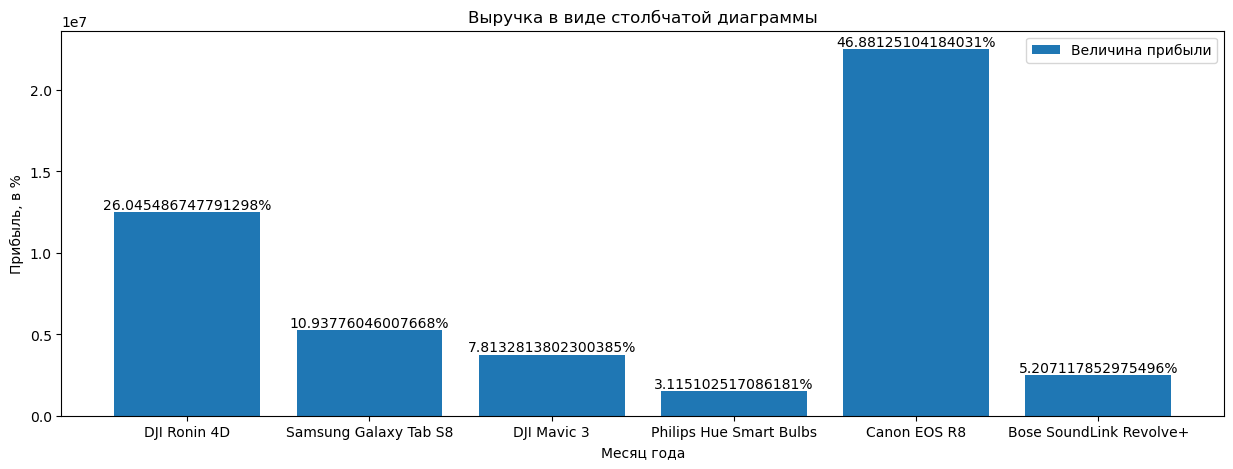


Общая выручка магазина: 47992000 рублей
Товар, который был продан наибольшее количество раз: Philips Hue Smart Bulbs
Товар, который принес наибольшую выручку: Canon EOS R8


In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
class HashTable:
    def __init__(self):
        self.capacity = 10
        self.size = 0 
        self.buckets = [None] * self.capacity 

    def add(self, key, value):
        index = hash(key) % self.capacity 
        node = self.buckets[index]
        while node:
            if node.key == key: 
                node.value = value
                return
            node = node.next
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self.resize()

    def get(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                return node.value
            node = node.next
        return None

    def resize(self):
        new_capacity = self.capacity * 2
        new_buckets = [None] * new_capacity 
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

def quick_sort(array):
    if len(array) < 1:
        return array
    else:
        pivot=array.pop()
        low, same, high = [], [pivot], [] 
        for item in array:
            if item == pivot:
                same.append(item)
            elif item > pivot:
                high.append(item)
            else:
                low.append(item)
        return quick_sort(low) + same + quick_sort(high)  

def calculate(file):
    ht1 = HashTable()
    ht2 = HashTable()
    rev, max_tovar = 0, 0

    max_tovar_name = ""
    count_row = 0
    names_array, reven_array = [], []

    for row in file:
        if len(row) >= 7:
            if count_row != 0:
                rev += int(row[6])

                if max_tovar < int(row[4]):
                    max_tovar = int(row[4])
                    max_tovar_name = row[2]

                reven_array.append(int(row[6]))
                ht2.add(str(row[6]), row[2])

                names_array.append(row[2])
                ht1.add(str(row[2]), row[4])
                ht1.add(str(row[2]) + "1", row[6])
        count_row += 1       

    for item in range(len(names_array)):
        print(f'{names_array[item]} был продан {ht1.get(names_array[item])} раз, доля товара от выручки составяет {round(int(ht1.get(names_array[item]+"1"))/rev*100,2)}%')

    plt.figure(figsize=(15, 5))
    plt.title('График количества продаж')
    plt.plot(names_array, reven_array, color='green', marker='o', markersize=7)
    for i, value in enumerate(reven_array):
      plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.bar(names_array, reven_array, label='Величина прибыли')
    plt.xlabel('Месяц года')
    plt.ylabel('Прибыль, в %')
    plt.title('Выручка в виде столбчатой диаграммы')
    plt.legend()
    for i, value in enumerate(reven_array):
          plt.text(i, value, str(value/rev*100) + "%", ha='center', va='bottom', fontsize=10)
    plt.show()
    
    result = quick_sort(reven_array)

    return rev, max_tovar_name, ht2.get(str(result[-1]))


try:
    data = pd.read_csv('table.csv', sep=';')
    with open("table.csv", encoding='utf-8') as file:
        file_reader = csv.reader(file, delimiter = ";")
        revenue, max_sales, max_tovar = calculate(file_reader)
        print()
        print(f'Общая выручка магазина: {revenue} рублей')
        print(f'Товар, который был продан наибольшее количество раз: {max_sales}')
        print(f'Товар, который принес наибольшую выручку: {max_tovar}')
except FileNotFoundError:
    print("Файл 'table.csv' не найден.")
except Exception as e:
    print(f"Неизвестная ошибка:{e}")